#                 CREDIT CARD FRAUD TRANSACTION DETECTION 

**Submitted By -**
- Uday Dikshit

### Problem Statement

According to a news report published on 18 March 2020, India witnessed more than 52,000 fraud transaction cases through credit card, debit cards and internet banking. Digital payment has taken over lives of general people and similarly cyber crime is taking over the digital payments. However fraud transaction through cards are not only the subject of cyber crime, many times theses are conducted manually and forcefully. The problem that here we are dealing with is fraud transactions through credit cards.It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

### Problem Solving Approach

- Machine learning is an application of artificial intelligence (AI) that provides systems the ability to automatically learn and improve from experience without being explicitly programmed.
- In this problem with the help of machine learning models we will aloow the system to identify and mark fraud transactions on its own.
- We will identify the best classification model that with justifiable accuracies will identify the fraud transactions.
- **Outline --**
- Understanding the problem
- Getting insights of the data
- Data preprocessing
- Applying models
- Evaluating, Testing and Comparing various models

### Importing Libraries

In [1]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#library for feature scaling
from sklearn.preprocessing import StandardScaler

#libraries for sampling
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

#libraries for evaluation of model
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_score, recall_score, precision_recall_curve, average_precision_score 

#classification model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

### Loading dataset 

In [2]:
default= pd.read_csv("creditcard.csv")
default.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
default.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Getting insights of the data

- The datasets contains transactions made by credit cards in September 2013 by european cardholders.
- This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
- It contains only numerical input variables which are the result of a PCA transformation.
- Unfortunately, due to confidentiality issues,original features and more background information about the data are absent.
- Features V1, V2, … V28 are the principal components obtained with PCA
- Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.
- The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning.
- Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

## Data Preprocessing

In [4]:
#checking for missing values
default.isnull().sum(axis=0)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**Missing Values** There are no missing values in the data.

In [5]:
#checking for clas imbalance
print(default['Class'].value_counts()/len(default))

0    0.998273
1    0.001727
Name: Class, dtype: float64


**Class Imbalance** ->  99% of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are not fraud. But we don't want our model to assume, we want our model to detect patterns that give signs of fraud. 

**Distribution** -> as mentioned above, features V1,V2,V3...V28 are dimensionally reduced and normally distributed, however Time and Amount are not uniformly distributed and requires attention.

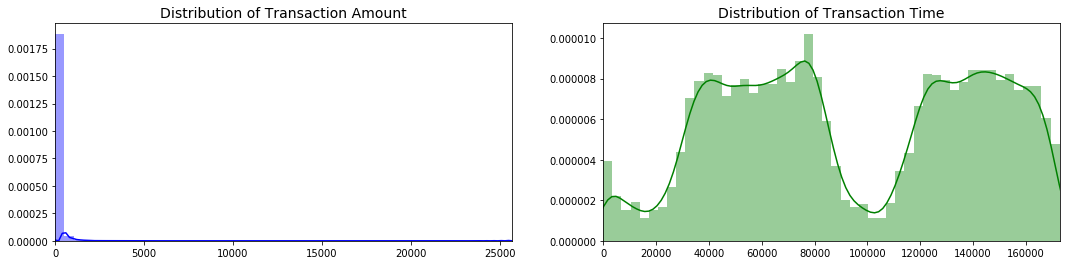

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))
amount_val = default['Amount'].values
time_val = default['Time'].values
sns.distplot(amount_val, ax=ax[0], color='b')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])
sns.distplot(time_val, ax=ax[1], color='g')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])
plt.show()

**Feature Scaling**-> Here we are scaling unscaled feautres 'Time' and 'Amount' using StandardScaler

In [7]:
#feature scaling
#using standard scaler
standard_scaler = StandardScaler()
default['scaled_amount'] = standard_scaler.fit_transform(default['Amount'].values.reshape(-1,1))
default['scaled_time'] = standard_scaler.fit_transform(default['Time'].values.reshape(-1,1))
default.drop(['Time','Amount'], axis=1, inplace=True)
scaled_amount = default['scaled_amount']
scaled_time = default['scaled_time']
default.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
default.insert(0, 'scaled_amount', scaled_amount)
default.insert(0, 'scaled_time', scaled_time)
default.head()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.996583,0.244964,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-1.996583,-0.342475,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.996562,1.160686,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-1.996562,0.140534,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.996541,-0.073403,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


##### Class Balancing 

In the original dataset there are only 492 fraud transaction out of 284,807 transactions, So here we are balancing the class for better training of model such that now as shown in the second countplot there are queal number(492) of fraud and normal transactions in our new dataset. 

Distribution of the Classes in the balanced dataset
1    0.5
0    0.5
Name: Class, dtype: float64


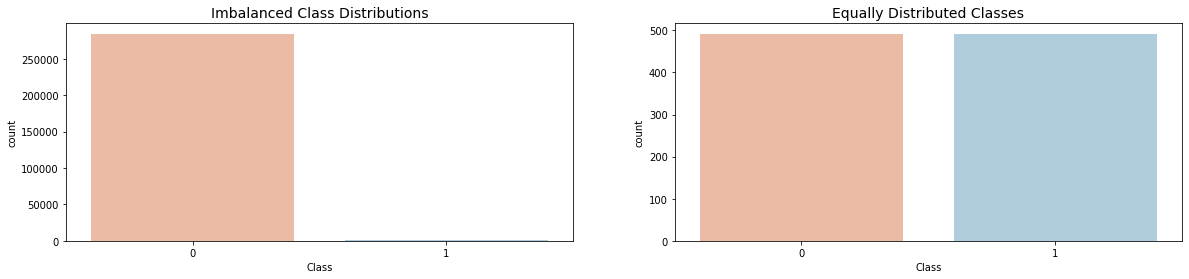

In [8]:
#class balancing
f, axes = plt.subplots(ncols=2, figsize=(20,4))
sns.countplot('Class', data=default, palette="RdBu", ax=axes[0])
axes[0].set_title('Imbalanced Class Distributions', fontsize=14)
default = default.sample(frac=1)
fraud_data = default.loc[default['Class'] == 1]
non_fraud_data = default.loc[default['Class'] == 0][:492]
normally_distributed_data = pd.concat([fraud_data, non_fraud_data])
#random shuffle
new_data = normally_distributed_data.sample(frac=1, random_state=42)
print('Distribution of the Classes in the balanced dataset')
print(new_data['Class'].value_counts()/len(new_data))
sns.countplot('Class', data=new_data, palette="RdBu", ax=axes[1])
axes[1].set_title('Equally Distributed Classes', fontsize=14)
plt.show()

###### Checking for Correlation 

In [9]:
#correlation
bal_sample_corr = new_data.corr()
print(bal_sample_corr['Class'].sort_values(ascending=False))

Class            1.000000
V4               0.718019
V11              0.690399
V2               0.487745
V19              0.272524
V20              0.151502
V21              0.129946
V27              0.081237
V28              0.076174
scaled_amount    0.063037
V8               0.057695
V25              0.038780
V26              0.003993
V22              0.000128
V23             -0.022956
V15             -0.072598
V13             -0.088985
V24             -0.104892
scaled_time     -0.148339
V5              -0.374875
V6              -0.413616
V1              -0.438634
V18             -0.468187
V7              -0.479947
V17             -0.559557
V9              -0.559755
V3              -0.567432
V16             -0.594913
V10             -0.622078
V12             -0.683099
V14             -0.747371
Name: Class, dtype: float64


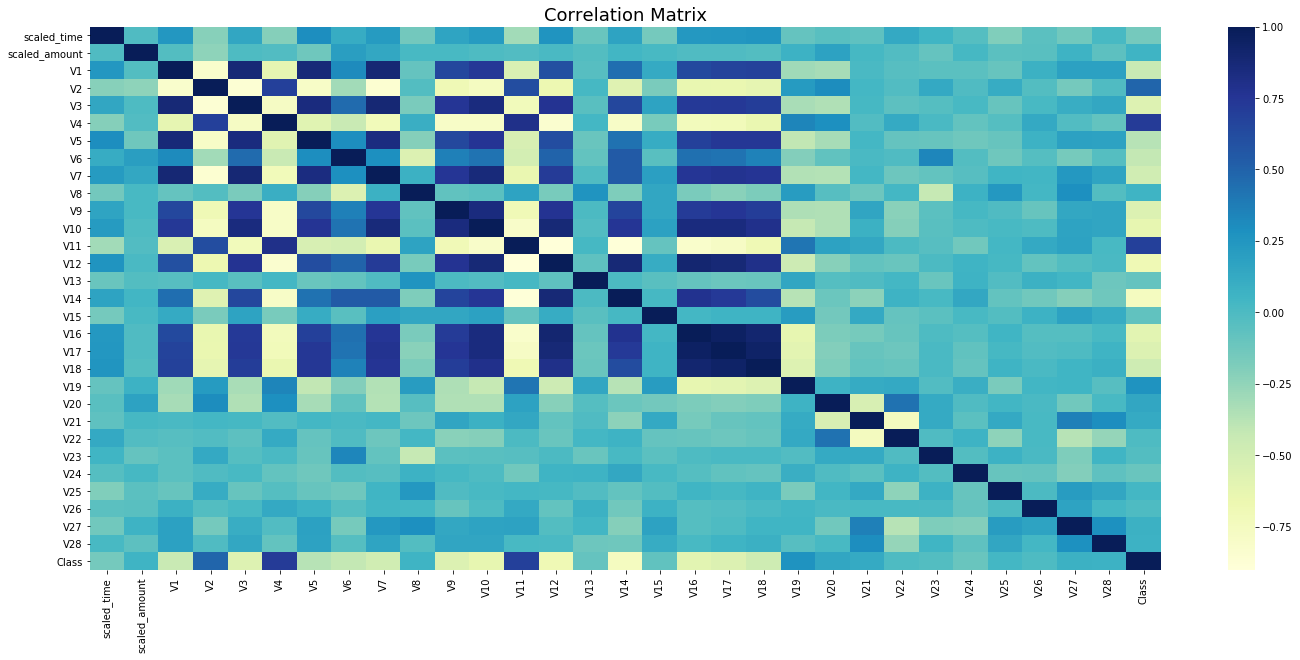

In [10]:
f, (ax) = plt.subplots(1, figsize=(24,10))
new_sample_corr = new_data.corr()
sns.heatmap(new_sample_corr, cmap='YlGnBu', annot_kws={'size':20}, ax=ax)
ax.set_title('Correlation Matrix', fontsize=18)
plt.show()

**From above correlation,**
--> V4, V11, V2 are in a positive correaltion with our target, Class.(higher these features, higher will be the probability of having a fraud transaction classified grows higher.
--> V14, V12, V10 are in a negative correlation with our target, Class.(lower these features, higher will be the chances of having a fraud transaction classified grows higher.

###### Outlier Detection

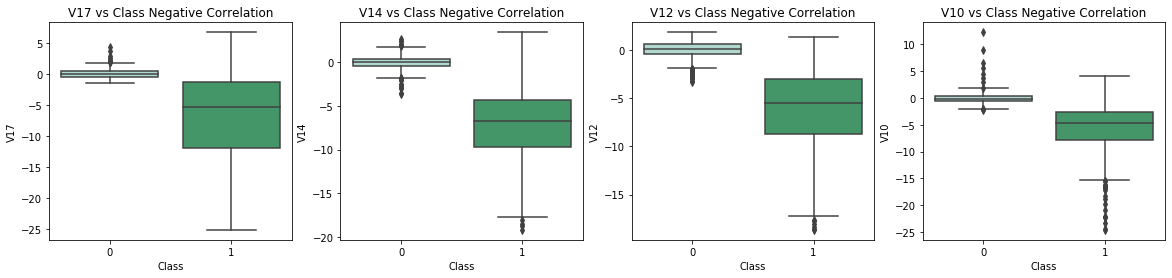

In [11]:
#outlier detection and removal using boxplot and Interquartile range
f, axes = plt.subplots(ncols=4, figsize=(20,4))

#Negative Correlation with Class
sns.boxplot(x="Class", y="V17", data=new_data, palette='BuGn', ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_data, palette='BuGn', ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=new_data, palette='BuGn', ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=new_data, palette='BuGn', ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

Here feature V14, V12 and V10 shows large number of outliers, whcih need to be attended.

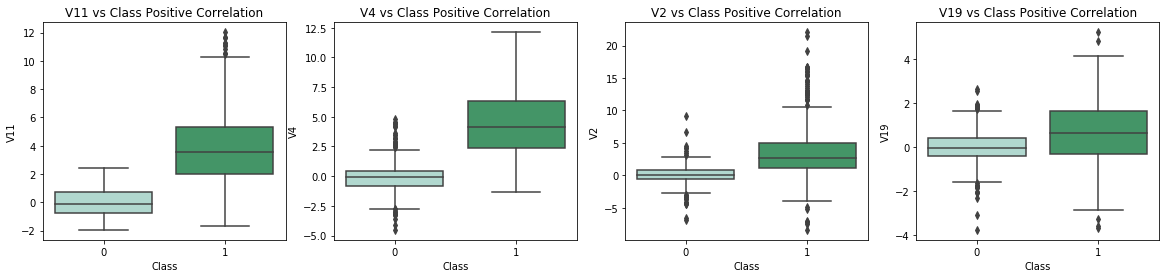

In [12]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations with Class
sns.boxplot(x="Class", y="V11", data=new_data, palette="BuGn", ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=new_data, palette="BuGn", ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=new_data, palette="BuGn", ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=new_data, palette="BuGn", ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

Here features V11, V2 and V19 shows large number of outliers, whcih needs to be attended.

###### Outlier Removal

As inferred earlier, we have too many outliers in features V14, V12, V10, V11, V2 and V19, so we will remove the 'extreme outliers' so that this do not distort accuracy of our model.

In [13]:
# dealing with feature V14 outliers for fraud transactions
v14_fraud = new_data['V14'].loc[new_data['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
v14_iqr = q75 - q25
v14_cut_off = v14_iqr * 3
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('V14 outliers:{}'.format(outliers))
#removing outliers from v14
new_data = new_data.drop(new_data[(new_data['V14'] > v14_upper) | (new_data['V14'] < v14_lower)].index)

#dealing with feature V12 outliers for fraud transactions
v12_fraud = new_data['V12'].loc[new_data['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25
v12_cut_off = v12_iqr * 3
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers:{}'.format(outliers))
#removing outliers from v12
new_data= new_data.drop(new_data[(new_data['V12'] > v12_upper) | (new_data['V12'] < v12_lower)].index)

# dealing with feature V10 outliers for fraud transactions
v10_fraud = new_data['V10'].loc[new_data['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25
v10_cut_off = v10_iqr * 3
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers:{}'.format(outliers))
#removing outliers from v10
new_data = new_data.drop(new_data[(new_data['V10'] > v10_upper) | (new_data['V10'] < v10_lower)].index)

#dealing with feature V11 outliers for fraud transactions
v11_fraud = new_data['V11'].loc[new_data['Class'] == 1].values
q25, q75 = np.percentile(v11_fraud, 25), np.percentile(v11_fraud, 75)
v11_iqr = q75 - q25
v11_cut_off = v11_iqr * 3
v11_lower, v11_upper = q25 - v11_cut_off, q75 + v11_cut_off
outliers = [x for x in v11_fraud if x < v11_lower or x > v11_upper]
print('V11 outliers:{}'.format(outliers))
#removing outliers from v11
new_data = new_data.drop(new_data[(new_data['V11'] > v11_upper) | (new_data['V11'] < v11_lower)].index)

#dealing with feature V2 outliers for fraud transactions
v2_fraud = new_data['V2'].loc[new_data['Class'] == 1].values
q25, q75 = np.percentile(v2_fraud, 25), np.percentile(v2_fraud, 75)
v2_iqr = q75 - q25
v2_cut_off = v2_iqr * 3
v2_lower, v2_upper = q25 - v2_cut_off, q75 + v2_cut_off
outliers = [x for x in v2_fraud if x < v2_lower or x > v2_upper]
print('V2 outliers:{}'.format(outliers))
#removing outliers from v2
new_data = new_data.drop(new_data[(new_data['V2'] > v2_upper) | (new_data['V2'] < v2_lower)].index)

V14 outliers:[]
V12 outliers:[]
V10 outliers:[-23.2282548357516, -24.5882624372475, -24.403184969972802]
V11 outliers:[]
V2 outliers:[16.7133892350242, 16.6978316913154, 16.1557014298057, 16.497471901867, 16.497471901867, 16.497471901867, 16.4345245512223, 16.497471901867]


### Classification

In [14]:
X=new_data.drop('Class', axis=1)
y=new_data['Class']
# splitting data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)
#values to array
X_train=X_train.values
X_test= X_test.values
y_train=y_train.values
y_test=y_test.values

Model accuracy from cross validation score:  0.951165501165501  
 


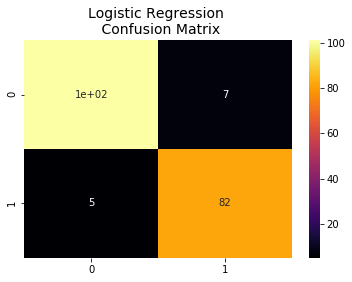

 

 Report : Logistics Regresion
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       108
           1       0.92      0.94      0.93        87

    accuracy                           0.94       195
   macro avg       0.94      0.94      0.94       195
weighted avg       0.94      0.94      0.94       195



 ROC curve: Logistic Regression


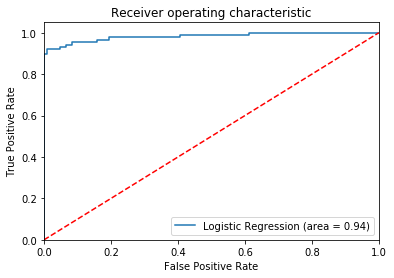

In [15]:
#logistic regression
logistic_Classifier= LogisticRegression(max_iter=100)
logistic_Classifier.fit(X_train, y_train)

# k cross validation
accuracies = cross_val_score(estimator=logistic_Classifier, X=X_train, y=y_train, cv=10)
model1_accuracy = accuracies.mean()
model1_standard_deviation = accuracies.std()
print("Model accuracy from cross validation score: ", model1_accuracy," \n ")

#predicting y value
fraud_predlog=logistic_Classifier.predict(X_test)

#confusion matrix
logistic_confusion_matrix=confusion_matrix(y_test,fraud_predlog)
sns.heatmap(logistic_confusion_matrix,annot=True, cmap=plt.cm.inferno)
plt.title('Logistic Regression \n Confusion Matrix', fontsize=14)
plt.show()

#generate report
print(" \n\n Report : Logistics Regresion")
print(classification_report(y_test, fraud_predlog))

#ROC curve
print("\n\n ROC curve: Logistic Regression")
area_under_curve = roc_auc_score(y_test, logistic_Classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logistic_Classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % area_under_curve)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Model accuracy from cross validation score:  0.9357642357642357  
 


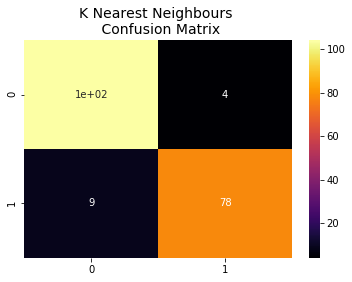



 Report : kNearestNeighbours
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       108
           1       0.95      0.90      0.92        87

    accuracy                           0.93       195
   macro avg       0.94      0.93      0.93       195
weighted avg       0.93      0.93      0.93       195



 ROC curve: KNearestNeighbours 



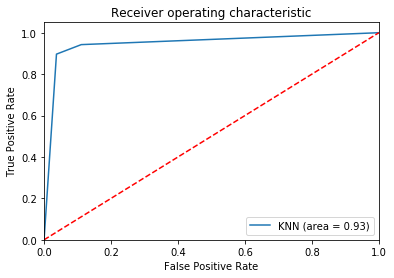

In [16]:
#knearestneighbours
knn_Classifier = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski', p = 2)
knn_Classifier.fit(X_train, y_train)

#k cross validation score
accuracies = cross_val_score(estimator=knn_Classifier, X=X_train, y=y_train, cv=10)
accuracies.mean()
accuracies.std()
model2_accuracy=accuracies.mean()
print("Model accuracy from cross validation score: ", model2_accuracy," \n ")

#predicting y value of test set
fraud_predknn=knn_Classifier.predict(X_test)

#confusion matrix
knn_confusion_matrix=confusion_matrix(y_test, fraud_predknn)
sns.heatmap(knn_confusion_matrix,annot=True, cmap=plt.cm.inferno)
plt.title('K Nearest Neighbours \n Confusion Matrix', fontsize=14)
plt.show()

#generating report
print("\n\n Report : kNearestNeighbours")
print(classification_report(y_test, fraud_predknn))

#ROC curve
print("\n\n ROC curve: KNearestNeighbours \n")
area_under_curve = roc_auc_score(y_test, knn_Classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, knn_Classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % area_under_curve)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Model accuracy from cross validation score:  0.9074925074925076  
 


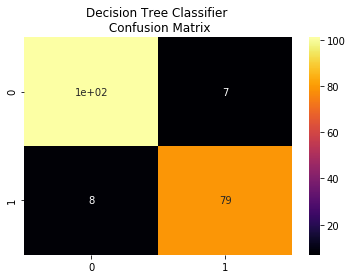

 

 Report : Decision Tree Classification
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       108
           1       0.92      0.91      0.91        87

    accuracy                           0.92       195
   macro avg       0.92      0.92      0.92       195
weighted avg       0.92      0.92      0.92       195

 

 ROC curve: Decision Tree Classification


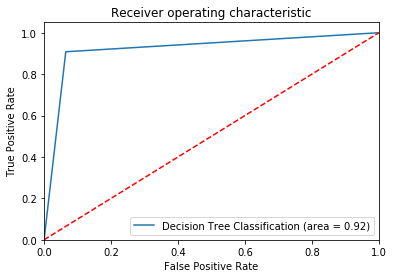

In [17]:
#Decision Tree Classifier
dt_Classifier = DecisionTreeClassifier(criterion = 'entropy')
dt_Classifier.fit(X_train, y_train)

# k cross validation score
accuracies = cross_val_score(estimator=dt_Classifier, X=X_train, y=y_train, cv=10)
model3_accuracy=accuracies.mean()
accuracies.std()
print("Model accuracy from cross validation score: ", model3_accuracy," \n ")

# predicting y value for test set
fraud_preddt=dt_Classifier.predict(X_test)

#confusion matrix
dt_confusion_matrix=confusion_matrix(y_test, fraud_preddt)
sns.heatmap(dt_confusion_matrix, annot=True, cmap=plt.cm.inferno)
plt.title("Decision Tree Classifier \n Confusion Matrix")
plt.show()

#generating report
print(" \n\n Report : Decision Tree Classification")
print(classification_report(y_test, fraud_preddt))

#ROC curve
print(" \n\n ROC curve: Decision Tree Classification")
area_under_curve = roc_auc_score(y_test, dt_Classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, dt_Classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree Classification (area = %0.2f)' % area_under_curve)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Model accuracy from cross validation score:  0.9331834831834831  
 


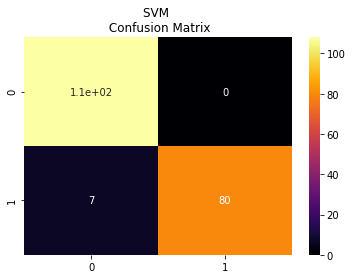

 

 Report : SVM
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       108
           1       1.00      0.92      0.96        87

    accuracy                           0.96       195
   macro avg       0.97      0.96      0.96       195
weighted avg       0.97      0.96      0.96       195

 

 ROC curve: SVM


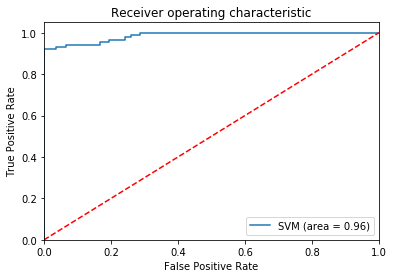

In [18]:
#Support Vector Classifier
svc_Classifier= SVC(kernel='rbf', probability= True)
svc_Classifier.fit(X_train, y_train)

#k cross validation score
accuracies = cross_val_score(estimator=svc_Classifier, X=X_train, y=y_train, cv=10)
model4_accuracy=accuracies.mean()
accuracies.std()
print("Model accuracy from cross validation score: ", model4_accuracy," \n ")

#predicting y value for test set
fraud_predsvc=svc_Classifier.predict(X_test)

#confusion matrix
svc_confusion_matrix=confusion_matrix(y_test, fraud_predsvc)
sns.heatmap(svc_confusion_matrix, annot=True, cmap=plt.cm.inferno)
plt.title("SVM \n Confusion Matrix")
plt.show()

#generating report
print(" \n\n Report : SVM")
print(classification_report(y_test, fraud_predsvc))

#ROC curve
print(" \n\n ROC curve: SVM")
area_under_curve = roc_auc_score(y_test, svc_Classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, svc_Classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % area_under_curve)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Comparing Models

##### ROC Curve

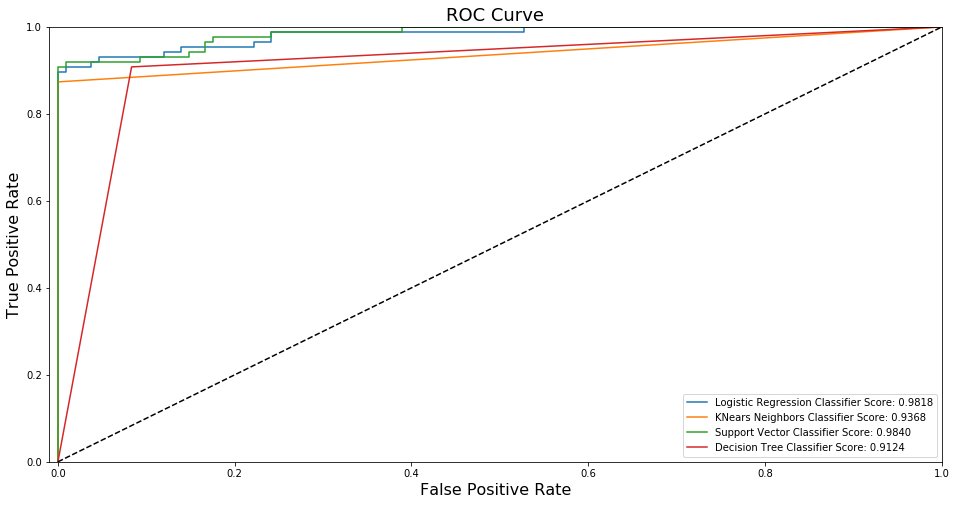

In [19]:
#using cross validation over test data
log_reg_pred = cross_val_predict(logistic_Classifier, X_test, y_test, cv=10,method="decision_function")
knears_pred = cross_val_predict(knn_Classifier, X_test, y_test, cv=10)

svc_pred = cross_val_predict(svc_Classifier, X_test, y_test, cv=10, method="decision_function")

tree_pred = cross_val_predict(dt_Classifier, X_test, y_test, cv=10)
log_fpr, log_tpr, log_thresold = roc_curve(y_test, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_test, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_test, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_test, tree_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_test, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_test, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_test, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()

***Result ->*** A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. Hence as here we plot ROC curve for all the learning models together, it is very much clear that ***SVM*** is the model with highest accuracies subjected to test set of binary classfication data for Credit Card fraud transaction detection. Even ***Logistic regression*** model is secondmost accurate and is a subject of interest. 
Therefore we will perform another test SvM and Logistic regression model using Precision Recall curve.

#### Precision- Recall Curve

Average precision-recall score, SVM: 0.99
Average precision-recall score, Logistic Regression: 0.98


Text(0.5, 1.0, 'Logistic Regression \n Precision-Recall curve: AP=0.98')

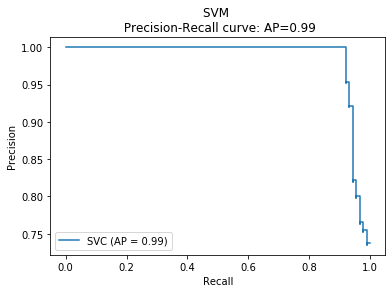

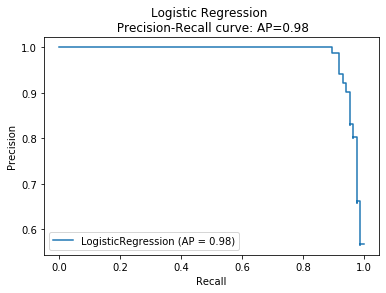

In [20]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

#svm
y_score_svm = svc_Classifier.decision_function(X_test)
average_precision_svm = average_precision_score(y_test, y_score_svm)
print('Average precision-recall score, SVM: {0:0.2f}'.format(
      average_precision_svm))
disp = plot_precision_recall_curve(svc_Classifier, X_test, y_test)
disp.ax_.set_title('SVM \n Precision-Recall curve: AP={0:0.2f}'.format(average_precision_svm))

#Logistic Regression
y_score_lg = logistic_Classifier.decision_function(X_test)
average_precision_lg = average_precision_score(y_test, y_score_lg)
print('Average precision-recall score, Logistic Regression: {0:0.2f}'.format(
      average_precision_lg))
disp = plot_precision_recall_curve(logistic_Classifier, X_test, y_test)
disp.ax_.set_title('Logistic Regression \n Precision-Recall curve: AP={0:0.2f}'.format(average_precision_lg))

***Result ->*** As in the ROC curve SVM was leading, likewise in the Precision- Recall curve again ***SVM*** comes out to be the best model for credit card fraud transaction detection system with respect to the preprocessing steps which includes balancing class, scaling features and removing outliers. If any change is made in the preprocessing steps the results might differ.

## Conclusion

- In this project we used four different classification model, namely Logistic Regression, KNearest Neighbors, Decision Tree, Support Vector machines and tested them to select the best model that can be used for credit card fraud transaction detection. 
- The dataset used to train and test these models was dimensionally reduced by PCA, class balanced, with scaled features and removed extreme outliers.
- After the preprocessing and trainning of models all the models were tested and evaluated using cross validation, confusion matrix, classification metrics report and ROC curve.
-  The test results were compared using ROC curve and Precision Recall curve.
- As per the results of these test Support Vector Machine Classifier  concluded to be the best model.
- The objective of the **support vector machine** algorithm is to find a hyperplane in an N-dimensional space(N the number of features) that distinctly classifies the data points.

# Thank You ! ! !